# Task 1.3: Exploratory Visualizations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Ticket 1.3.1: Create visualizations for the distribution of target variables

Goals: 
- Generate charts showing H1N1 and seasonal vaccination rates
- Visualize overlap between the two vaccination types

Steps:
1. Load and merge datasets
2. Plot vaccination rates and correlations/overlap


In [2]:
# Load training data

# Path is anchored relative to this notebook location
ROOT = Path.cwd().parent

PRO_DATA = ROOT / "data" / "processed"
RAW_DATA = ROOT / "data" / "raw"

training_features = pd.read_csv(RAW_DATA / "training_set_features.csv", index_col="respondent_id")
training_labels = pd.read_csv(RAW_DATA / "training_set_labels.csv", index_col="respondent_id")

In [3]:
# Merge labels and features
training_data = training_features.merge(training_labels, on='respondent_id')

print(f"Total records: {len(training_data)}")
print(f"H1N1 vaccination rate: {training_data['h1n1_vaccine'].mean():.2%}")
print(f"Seasonal vaccination rate: {training_data['seasonal_vaccine'].mean():.2%}")

Total records: 26707
H1N1 vaccination rate: 21.25%
Seasonal vaccination rate: 46.56%


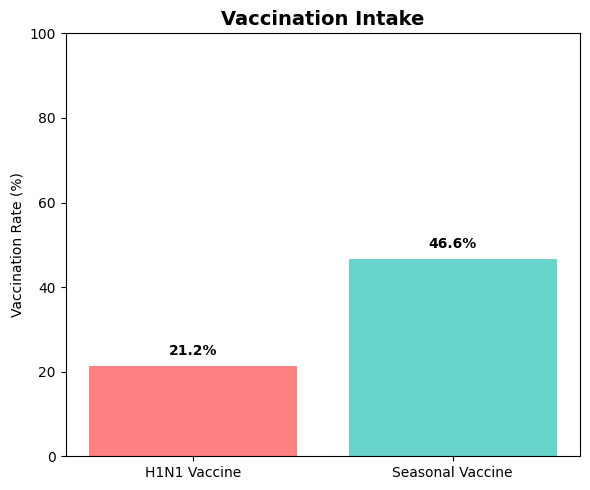

In [4]:
# Create visualization of vaccination rates

vac_rates = pd.DataFrame({
    'Vaccine Type': ['H1N1 Vaccine', 'Seasonal Vaccine'],
    'Vaccination Rate (%)': [
        training_data['h1n1_vaccine'].mean() * 100,
        training_data['seasonal_vaccine'].mean() * 100        ]
  })
    

# Create single figure
plt.figure(figsize=(6, 5))
bars = plt.bar(
    vac_rates['Vaccine Type'],
    vac_rates['Vaccination Rate (%)'],
    color=['#FF6B6B', '#4ECDC4'], 
    alpha=0.85
)

# Add labels above bars
for i, (bar, rate) in enumerate(zip(bars, vac_rates['Vaccination Rate (%)'])):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        f'{rate:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Axis labels and title
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Intake', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

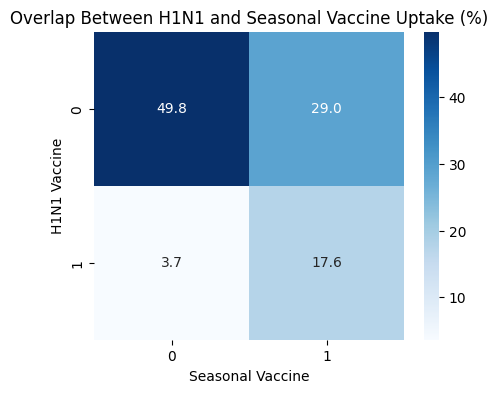

In [5]:
# Create overlap graphic
overlap = pd.crosstab(
    training_labels['h1n1_vaccine'],
    training_labels['seasonal_vaccine'],
    normalize='all'  # use normalize=None for raw counts
)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(overlap * 100, annot=True, fmt='.1f', cmap='Blues')
plt.title('Overlap Between H1N1 and Seasonal Vaccine Uptake (%)')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.show()

### Observations

Only 21.2% took the H1N1 vaccination while 46.6% took the seasonal vaccine. 

The overlap between those that didn't take any vaccine is 49.8% while those who took both are 17.6% 
29% took the seasonal vaccine but not the H1N1 vaccine

## Ticket 1.3.2: Visualize relationships between demographic variables and vaccination rates

In [6]:
# Import necessary functions and libraries

import sys, os
repo_root = os.path.abspath("..")
if repo_root not in sys.path:
    sys.path.append(repo_root)

from src.visualizations import plot_rates, plot_heatmap, cramers_v, analyse_test
from scipy.stats import chi2_contingency, kruskal, f_oneway


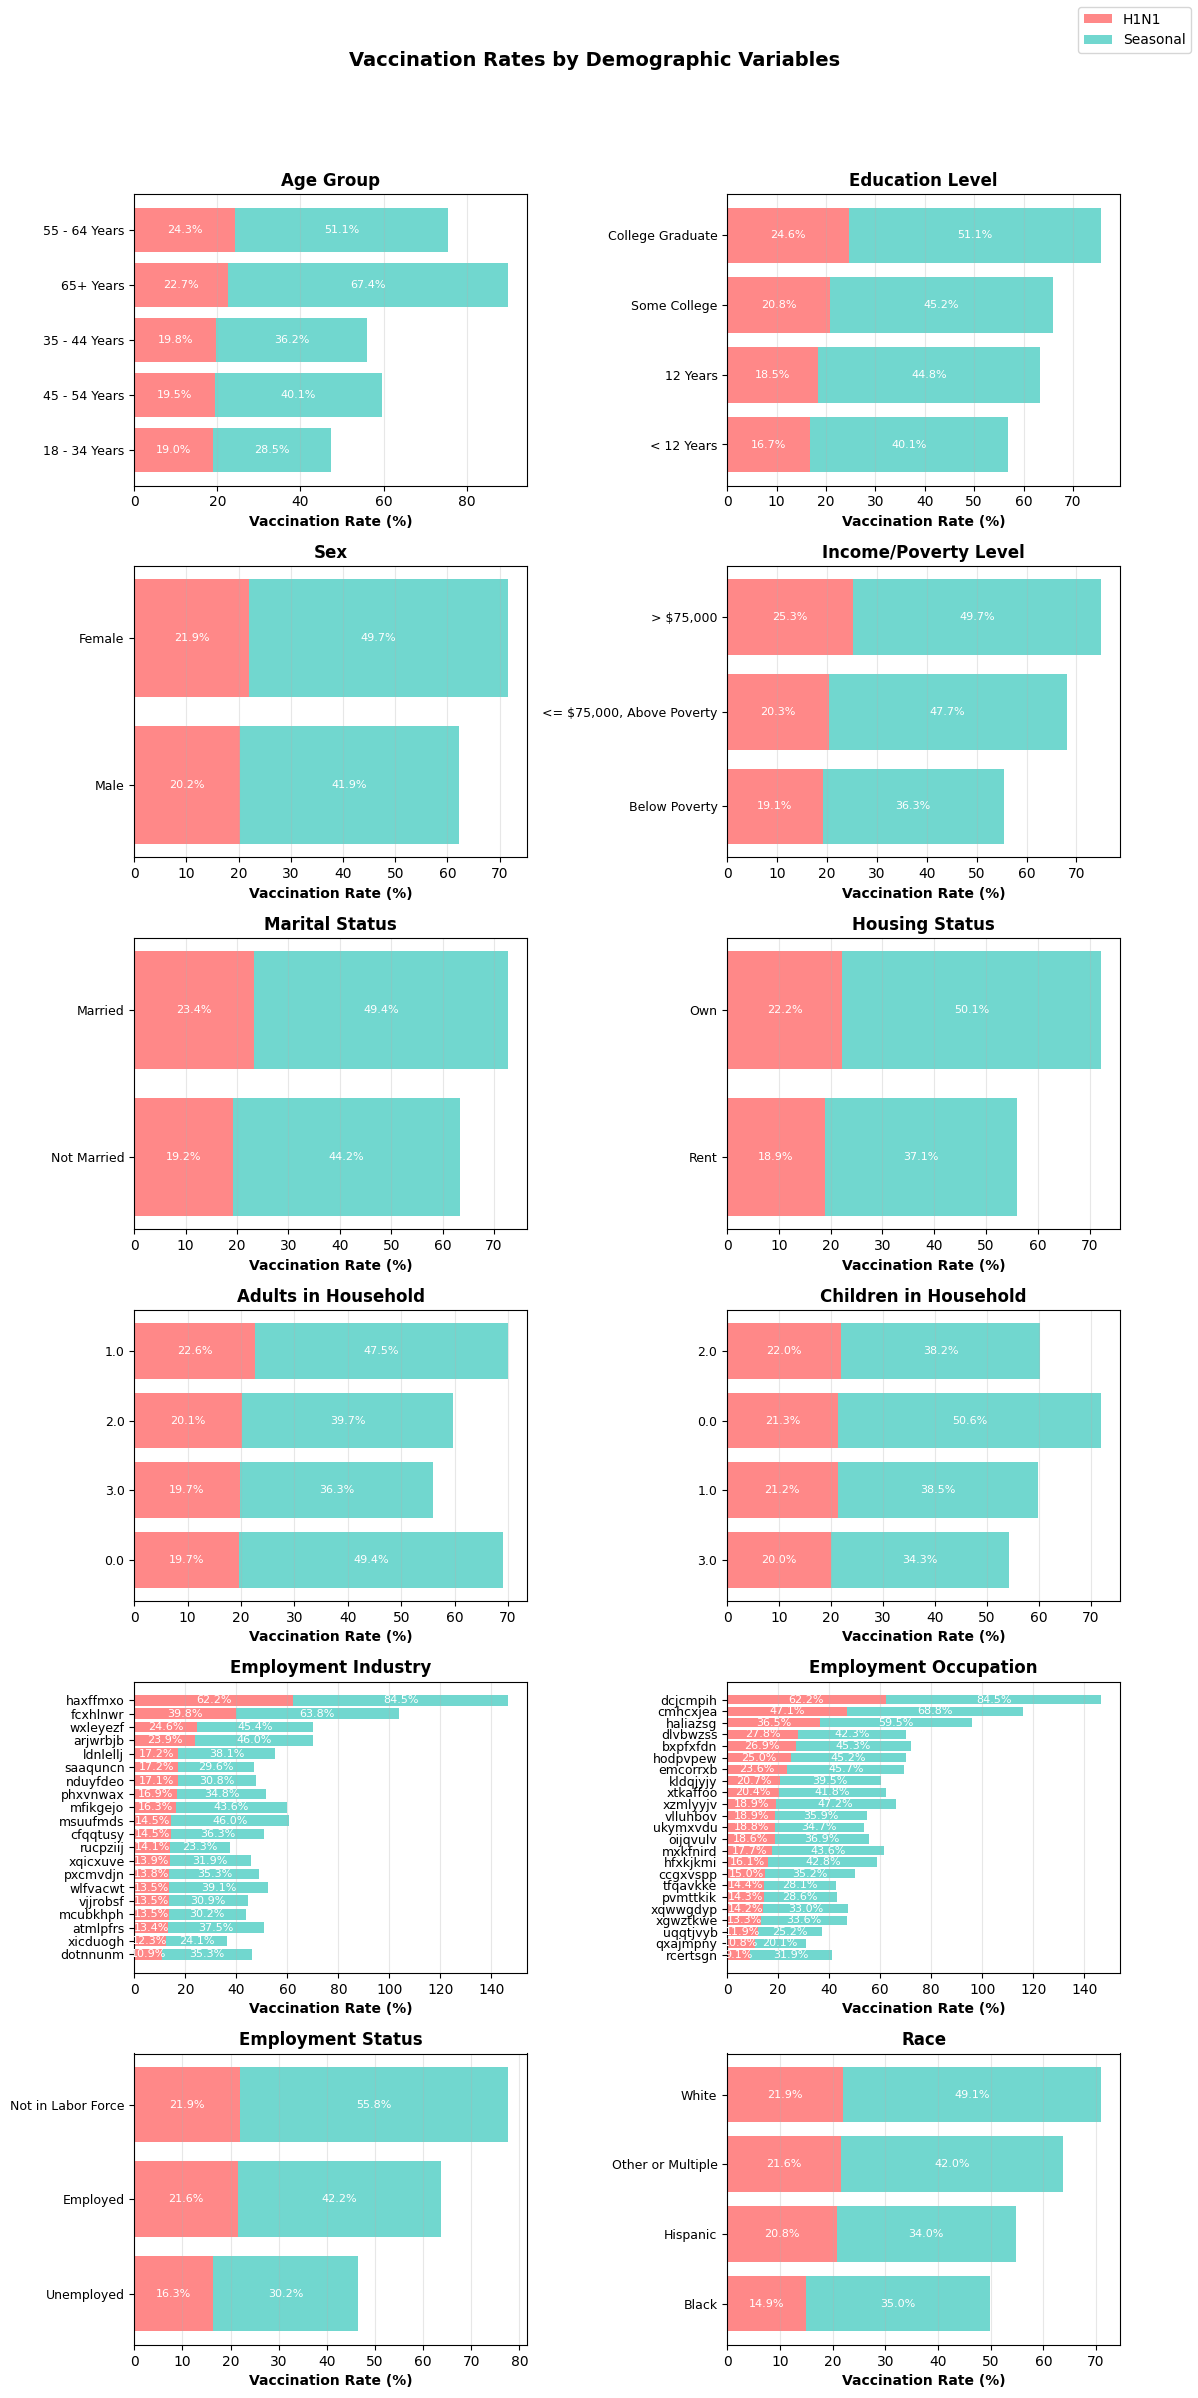

In [7]:
# Define demographic variables

demographic_cat_vars = {
    'age_group': 'Age Group',
    'education': 'Education Level',
    'sex': 'Sex',
    'income_poverty': 'Income/Poverty Level',
    'marital_status': 'Marital Status',
    'rent_or_own': 'Housing Status',
    'household_adults': 'Adults in Household',
    'household_children': 'Children in Household',
    'employment_industry': 'Employment Industry',
    'employment_occupation': 'Employment Occupation',
    'employment_status': 'Employment Status',
    'race': 'Race'
}

plot_rates(training_data, "Demographic", demographic_cat_vars, 2)


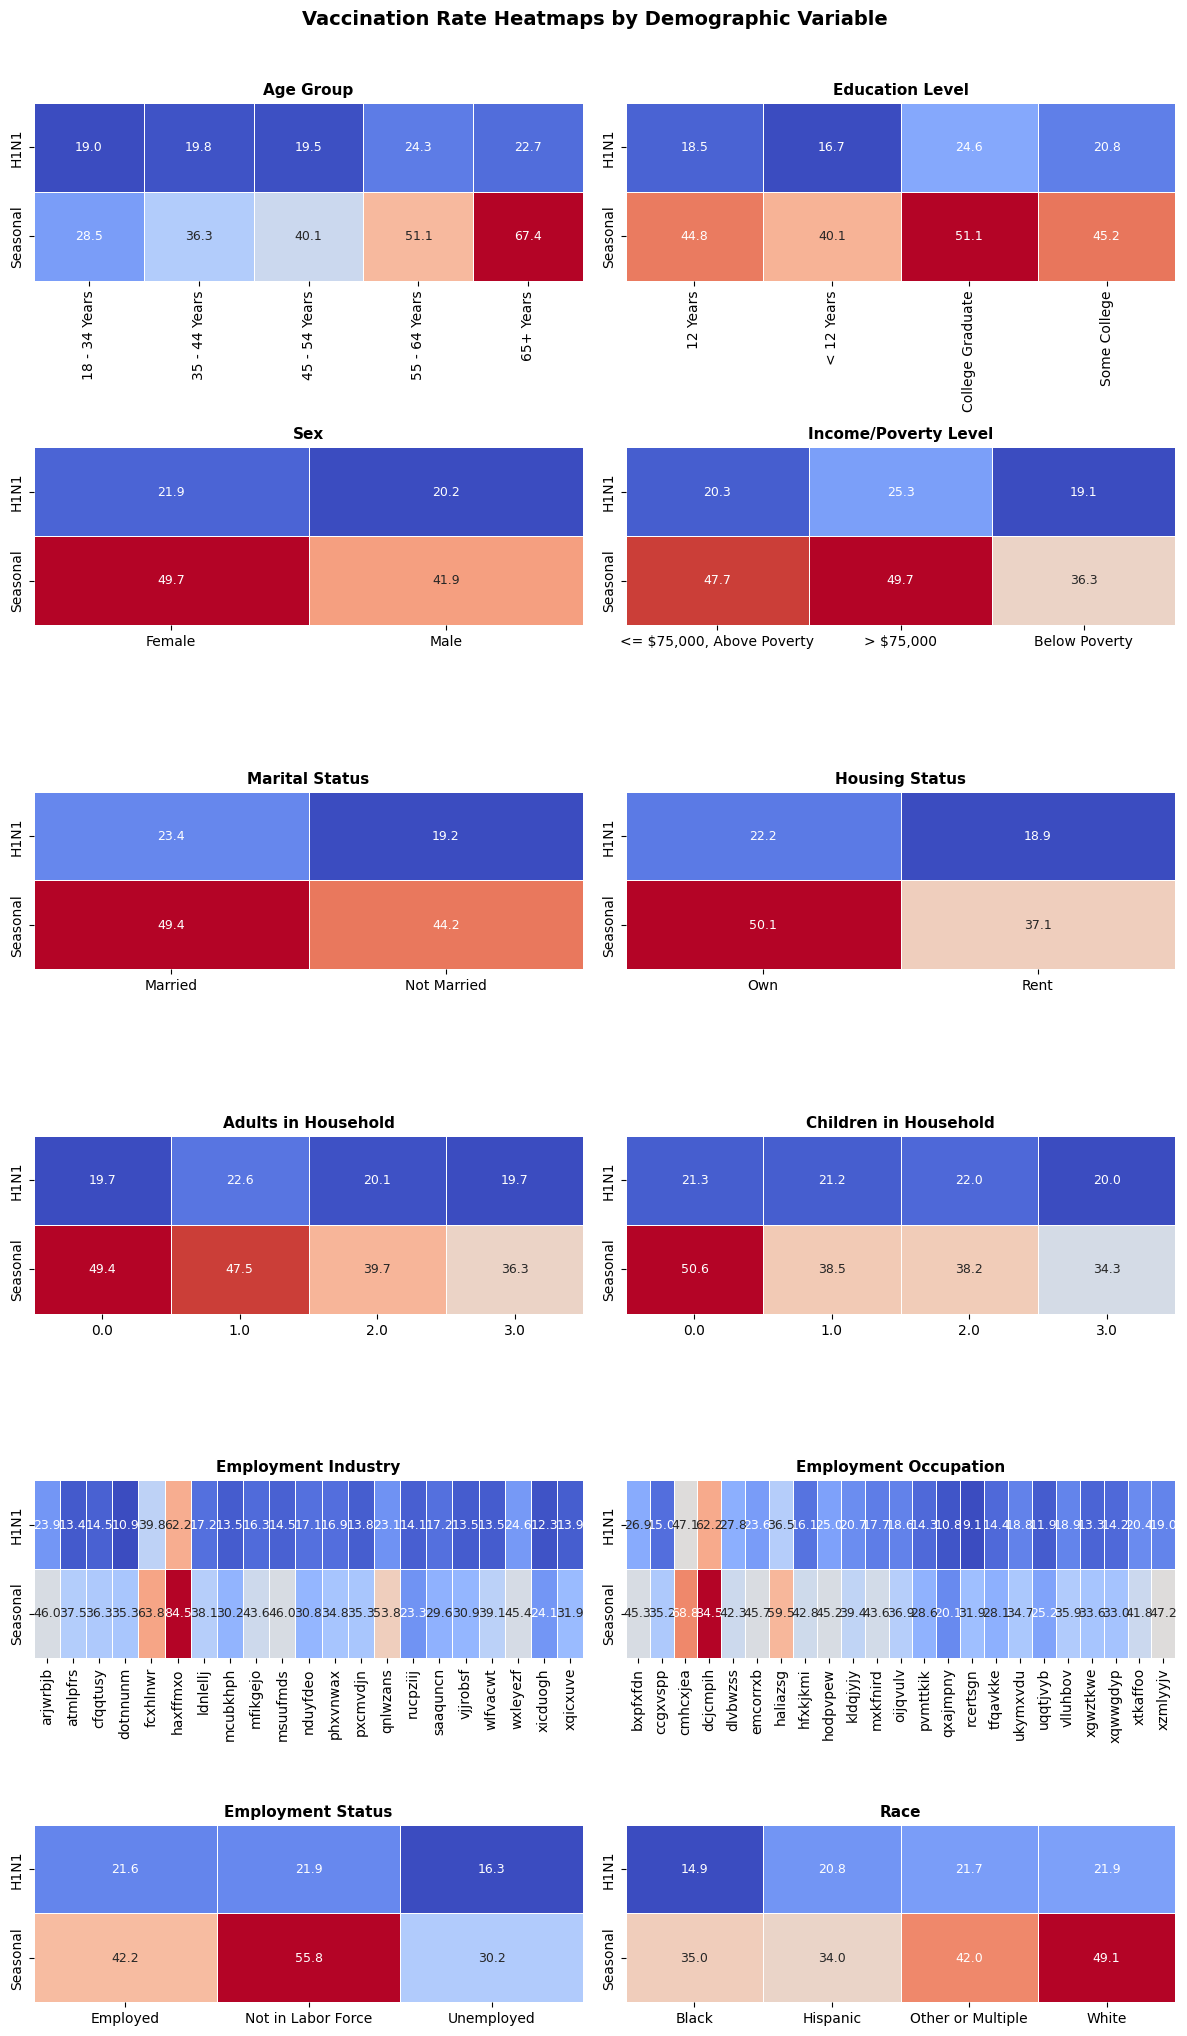

In [8]:
plot_heatmap(training_data, "Demographic", demographic_cat_vars, 2)

Variable: age_group
Vaccine: H1N1
    • Chi-square test: χ²=69.45, p=2.972e-14 → Significant
    • Cramér’s V: 0.050 (weak association)
Vaccine: SEASONAL
    • Chi-square test: χ²=2175.61, p=0 → Significant
    • Cramér’s V: 0.285 (moderate association)
Variable: education
Vaccine: H1N1
    • Chi-square test: χ²=123.04, p=1.706e-26 → Significant
    • Cramér’s V: 0.069 (weak association)
Vaccine: SEASONAL
    • Chi-square test: χ²=134.84, p=4.886e-29 → Significant
    • Cramér’s V: 0.072 (weak association)
Variable: sex
Vaccine: H1N1
    • Chi-square test: χ²=11.31, p=0.0007709 → Significant
    • Cramér’s V: 0.020 (weak association)
Vaccine: SEASONAL
    • Chi-square test: χ²=158.40, p=2.525e-36 → Significant
    • Cramér’s V: 0.077 (weak association)
Variable: income_poverty
Vaccine: H1N1
    • Chi-square test: χ²=76.29, p=2.712e-17 → Significant
    • Cramér’s V: 0.058 (weak association)
Vaccine: SEASONAL
    • Chi-square test: χ²=146.68, p=1.406e-32 → Significant
    • Cramér’s V: 

c:\Users\blxck\Desktop\neuro_flushot\src\visualizations.py:207: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ).applymap(lambda x: -np.log10(x) if pd.notna(x) else np.nan)
c:\Users\blxck\Desktop\neuro_flushot\src\visualizations.py:207: RuntimeWarning: divide by zero encountered in log10
  ).applymap(lambda x: -np.log10(x) if pd.notna(x) else np.nan)


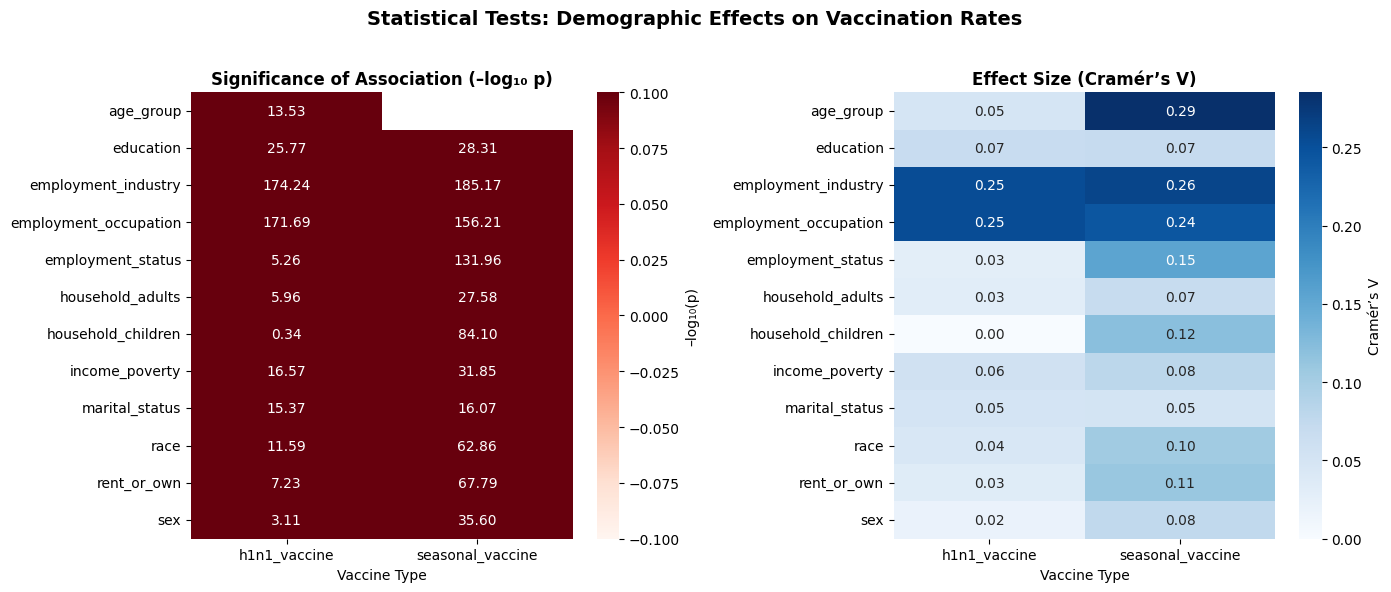


 Demographic analysis complete. Summary table returned.



In [9]:
demographic_results = analyse_test(
    data=training_data,
    target="Demographic",
    categorical_vars=demographic_cat_vars.keys(),
    tests=['chi2', 'cramers_v'],
    alpha=0.05,
    visualize=True
)

## Ticket 1.3.3: Analyze correlations between opinions/behaviors and vaccination decisions

In [ ]:
training_data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [ ]:
# Define opinion data

# Opinion data is categorical
opinon_cat_data = {
    'h1n1_concern': 'HN1N1 concern',
    'h1n1_knowledge': 'HN1N1 knowledge',
    'opinion_h1n1_vacc_effective': 'H1N1 Vaccine Effectiveness',
    'opinion_h1n1_risk': 'H1N1 Risk Without Vaccine',
    'opinion_h1n1_sick_from_vacc': 'Sick From H1N1 Vaccine',
    'opinion_seas_vacc_effective': 'Seasonal Vaccine Effectiveness',
    'opinion_seas_risk': 'Seasonal Risk Without Vaccine',
    'opinion_seas_sick_from_vacc': 'Sick From Seasonal Vaccine'
}

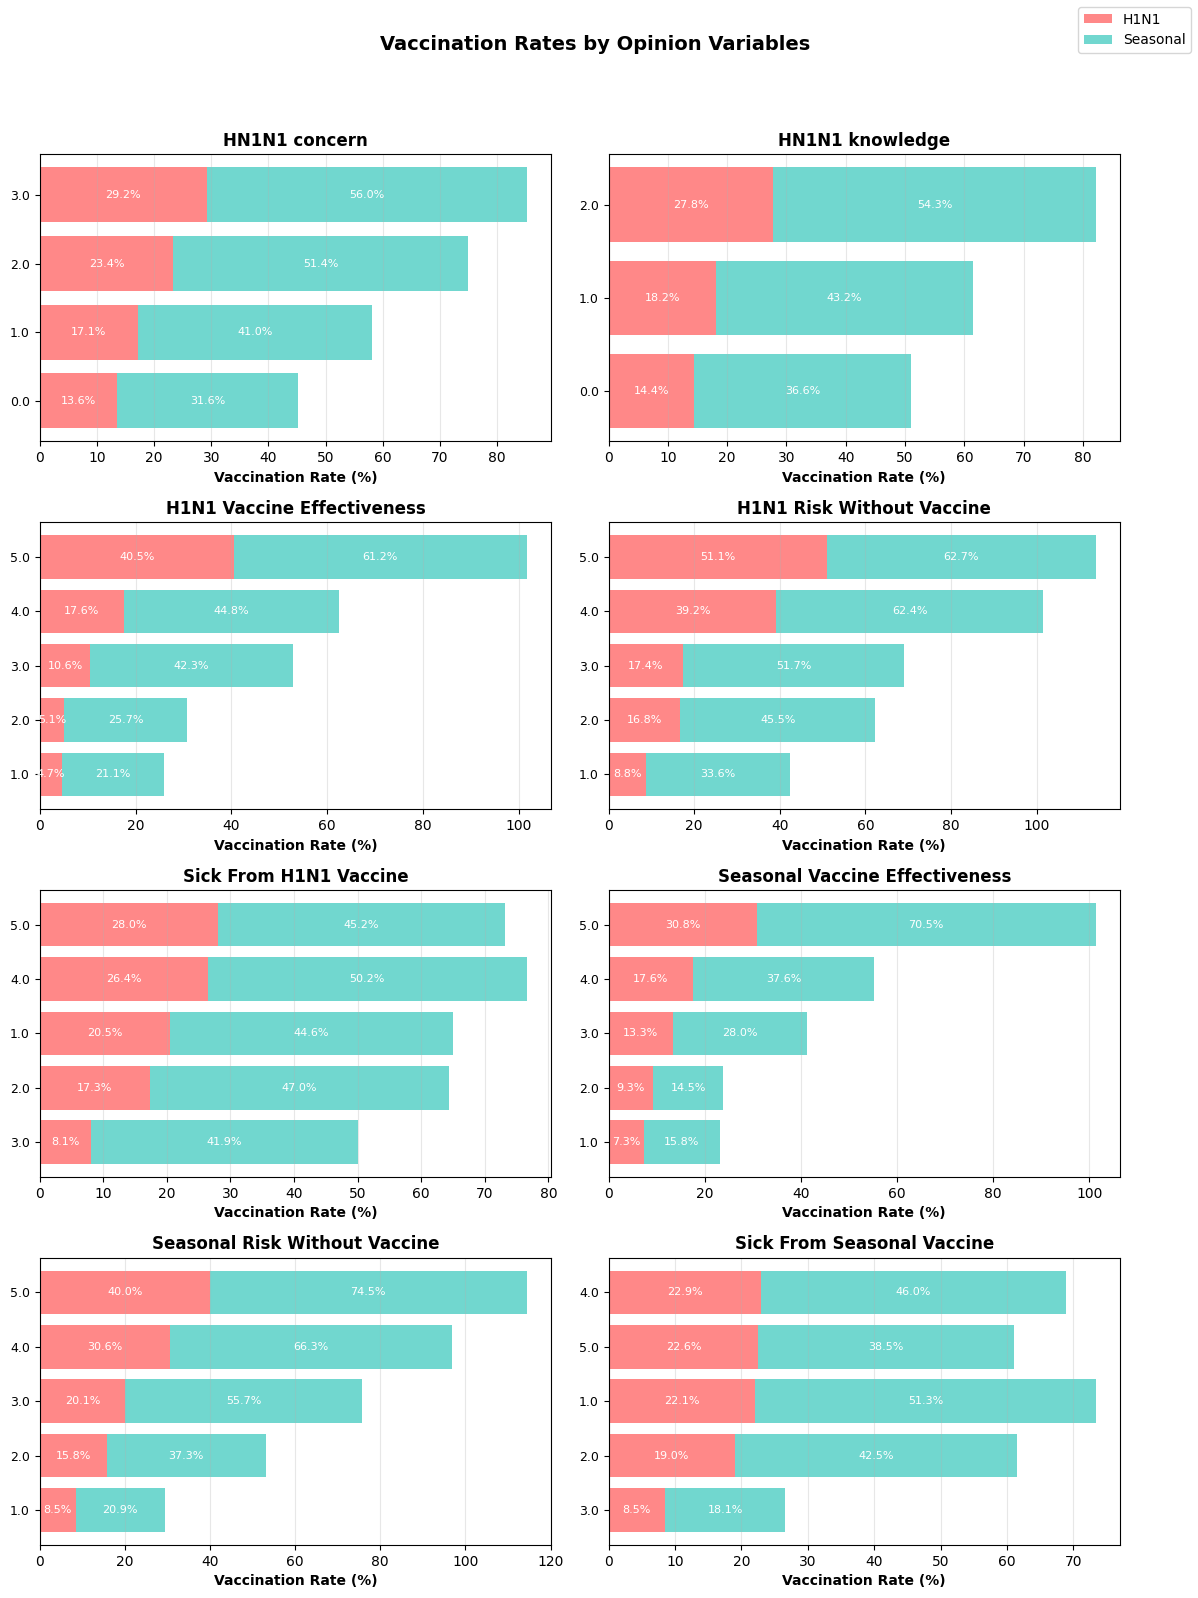

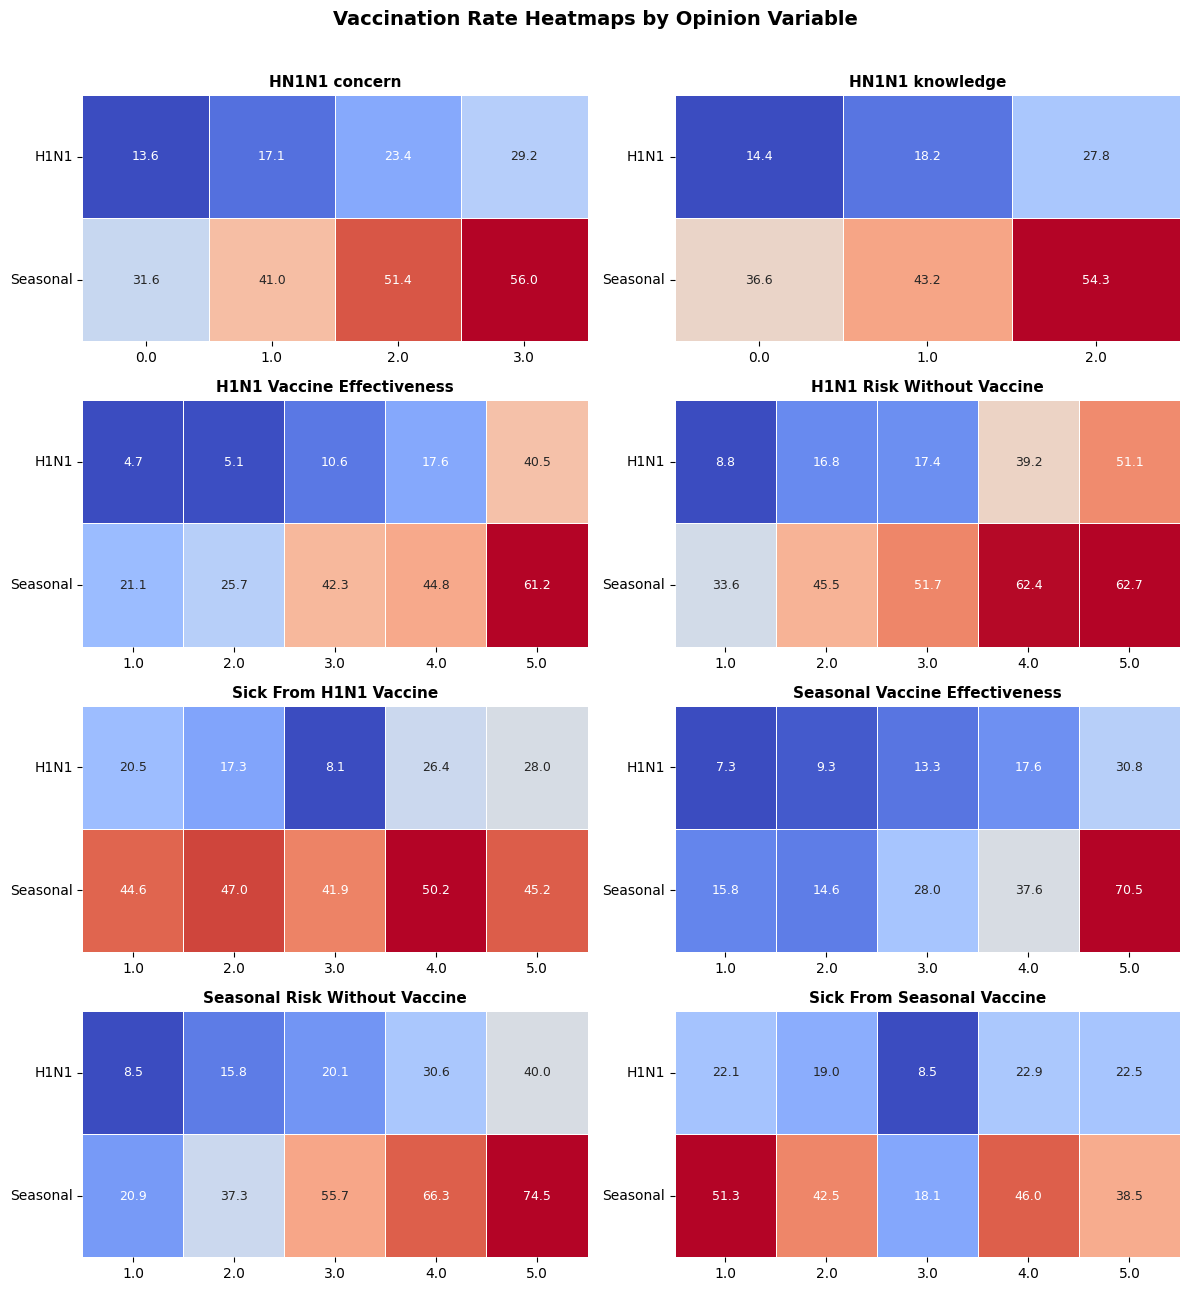

In [ ]:
# Visualizations for opinion data

plot_rates(training_data, "Opinion", opinon_cat_data, 2) # To improve: Visualizations need to show the content of replies (not just 0-4)
plot_heatmap(training_data, "Opinion", opinon_cat_data, 2)

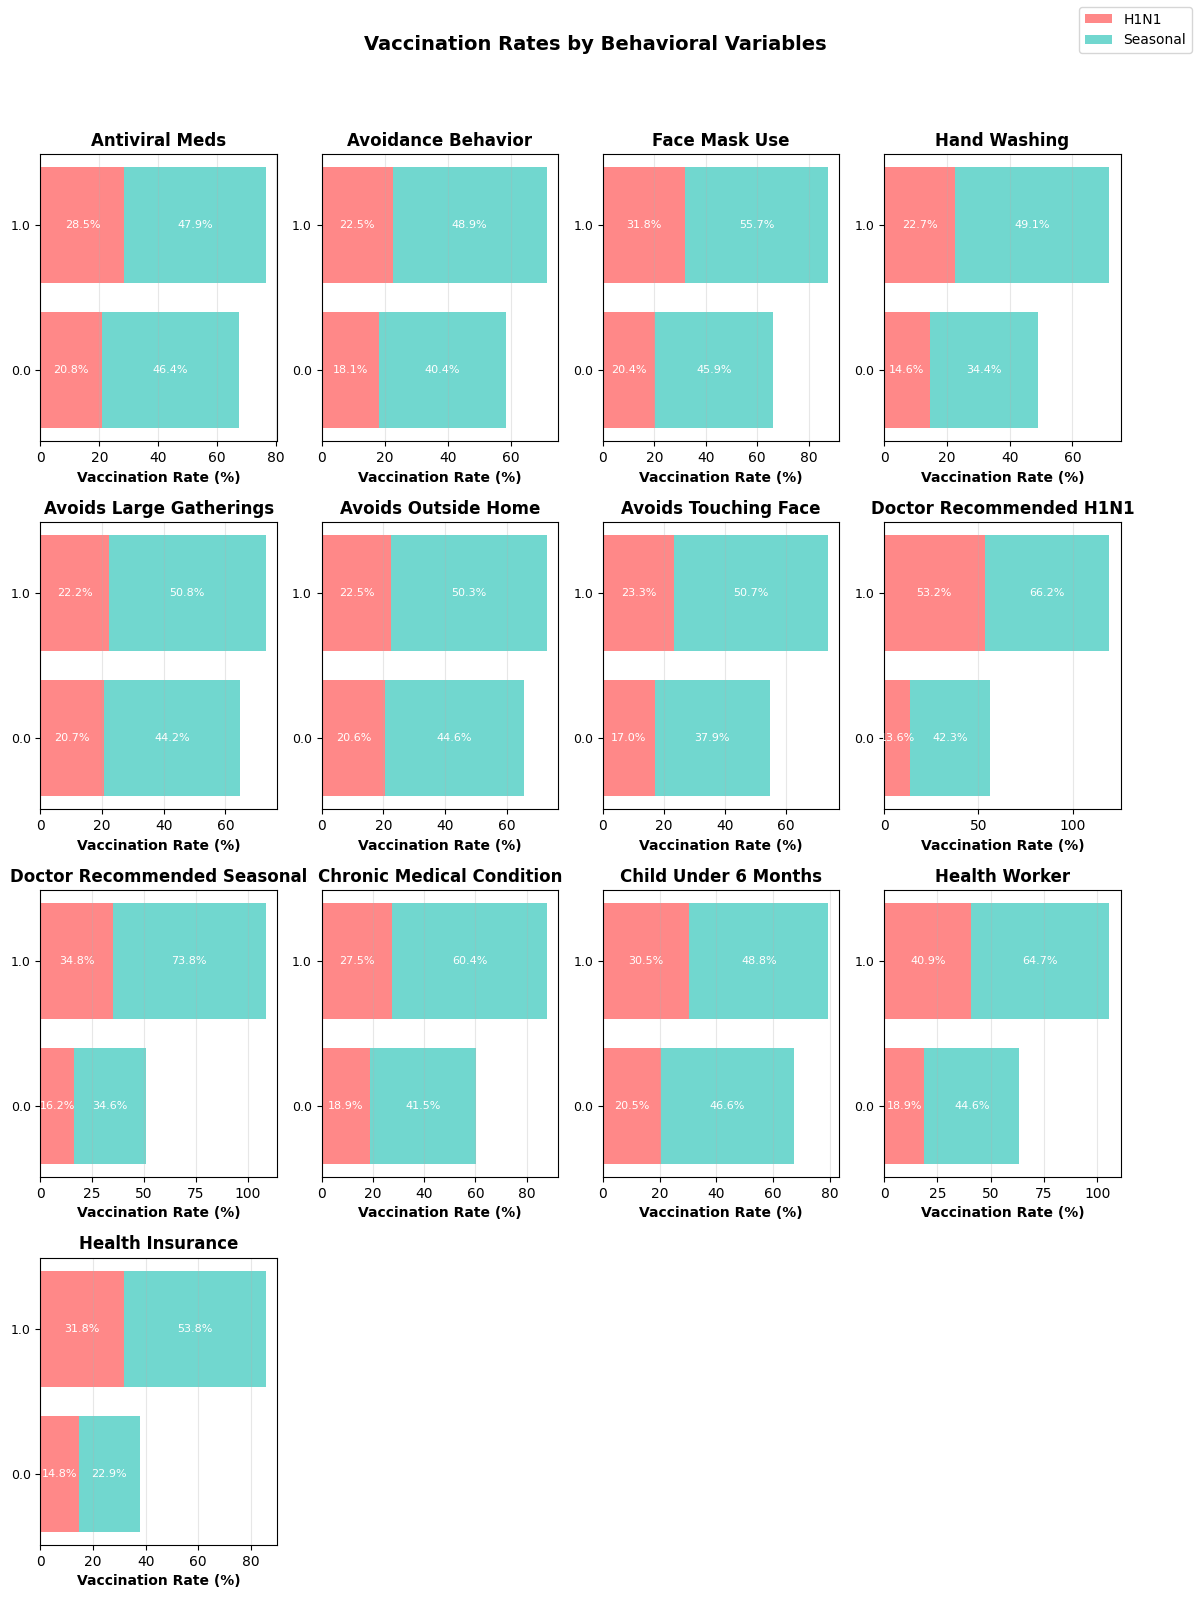

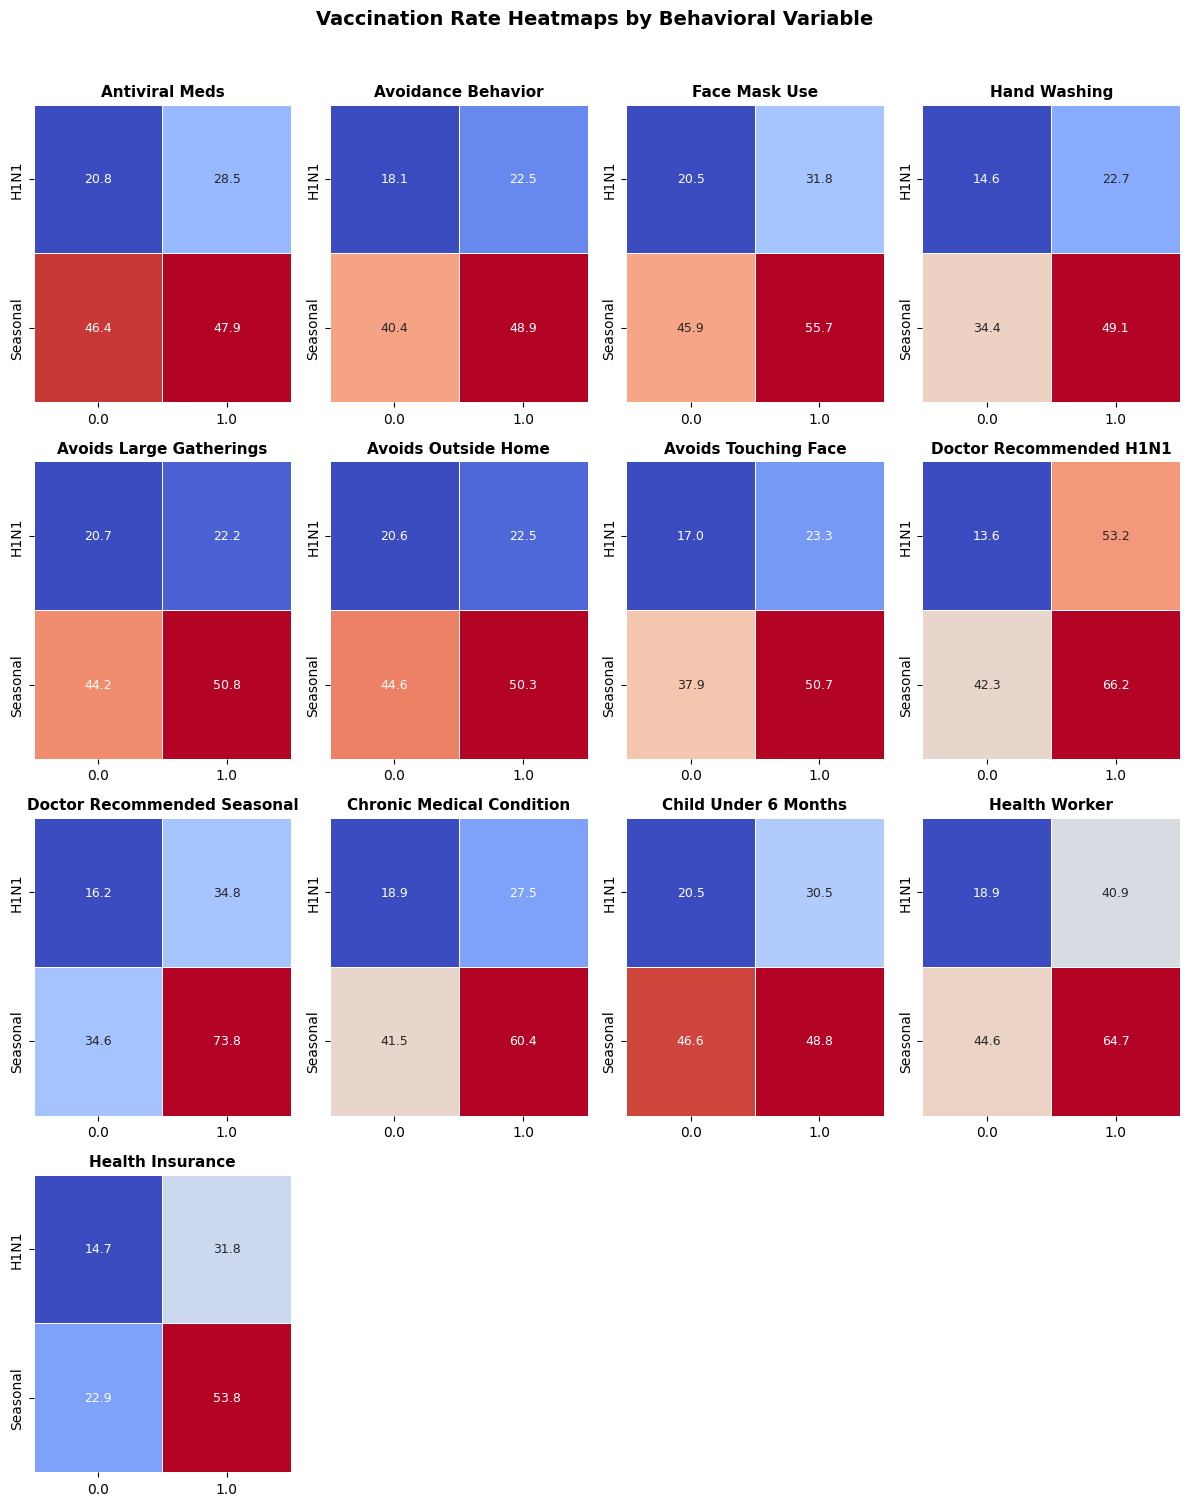

In [25]:
# Define behavioral data

behavioral_vars = {
    'behavioral_antiviral_meds': 'Antiviral Meds',
    'behavioral_avoidance': 'Avoidance Behavior',
    'behavioral_face_mask': 'Face Mask Use',
    'behavioral_wash_hands': 'Hand Washing',
    'behavioral_large_gatherings': 'Avoids Large Gatherings',
    'behavioral_outside_home': 'Avoids Outside Home',
    'behavioral_touch_face': 'Avoids Touching Face',
    'doctor_recc_h1n1': 'Doctor Recommended H1N1',
    'doctor_recc_seasonal': 'Doctor Recommended Seasonal',
    'chronic_med_condition': 'Chronic Medical Condition',
    'child_under_6_months': 'Child Under 6 Months',
    'health_worker': 'Health Worker',
    'health_insurance': 'Health Insurance'
}

# Plot rates and heatmap
plot_rates(training_data, "Behavioral", behavioral_vars, n_cols=4)
plot_heatmap(training_data, "Behavioral", behavioral_vars, n_cols=4)

## Ticket 1.3.4: Investigate geographical patterns in vaccination rates

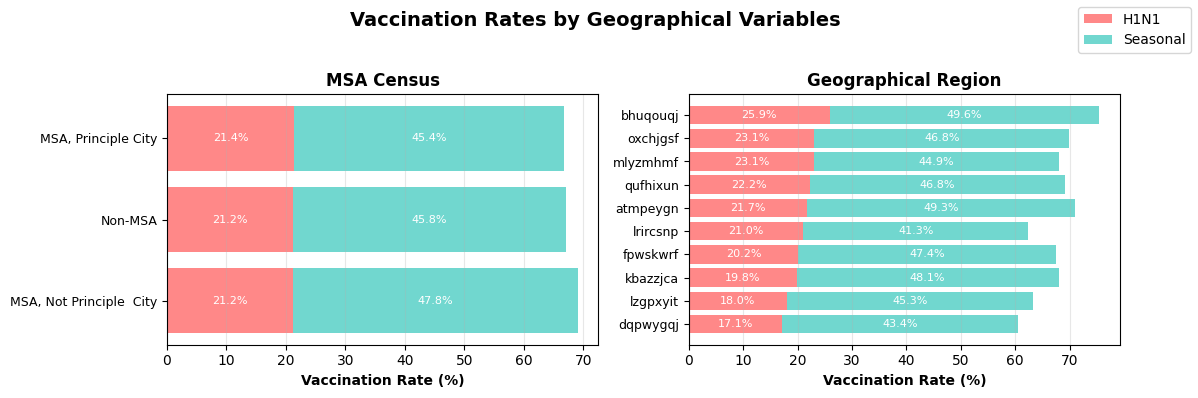

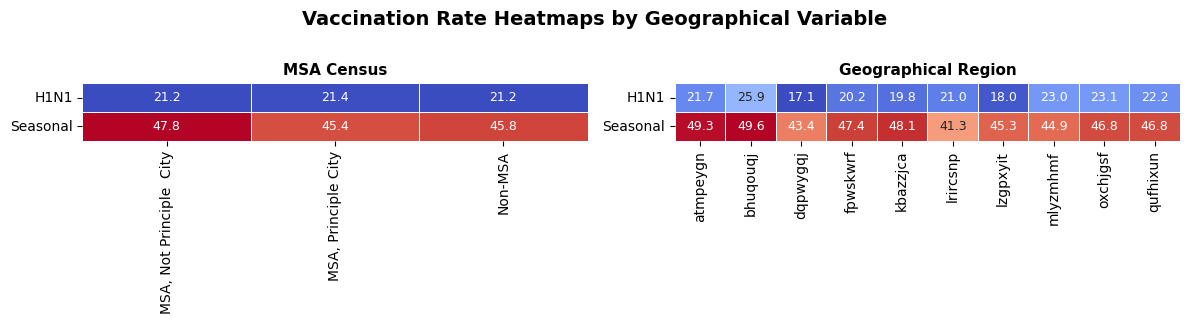

In [22]:
# Geographical data and analysis

geographical_cat_data = {'census_msa': 'MSA Census', 'hhs_geo_region':"Geographical Region"}

plot_rates(training_data, "Geographical", geographical_cat_data, 2)
plot_heatmap(training_data, "Geographical", geographical_cat_data, 2)